### 定义LMS

In [1]:
def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b

### 生成数据集

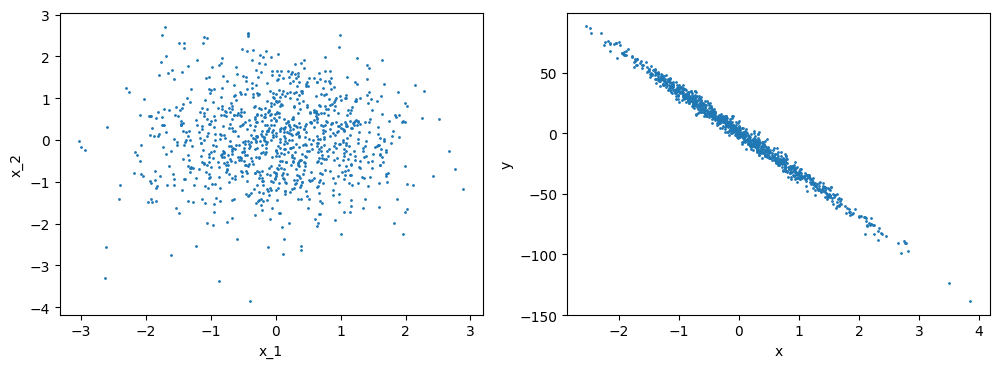

In [4]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

num_train = 1000
num_test = 100

# 制作数据集
data = make_regression(n_samples=num_train, n_features=2)

# 可视化数据集
plt.figure(figsize=[12, 4], dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')

# 将数据集分割成为训练集与测试集
# 并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

In [12]:
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense

In [13]:
with tf.Graph().as_default() as g:
    input_size=2
    W = np.random.randn(2)  # 初始化连接权重
    b = 0                   # 初始化偏置值
    X=Input(shape=[None,input_size])
    out=model(X,W,b)

In [15]:
    epochs = 100

    # 设置early_stopping回调函数，当验证集acc不再升高时停止训练
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=2,mode='max')


### 训练


In [19]:

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size= 32
    for epoch in range(200):
        order = np.argsort(np.random.random(shape(train_y)))
        train_data = train_x[order]
        train_label = train_y[order]
        
        res_train_losses = []
        for i in range(train_label.shape[0] // batch_size):
            start = i * batch_size
            end = (i + 1) * batch_size
            res_train_loss, _ = sess.run([loss, train_op],
                     feed_dict={inputs: train_data[start: end],
                                labels: train_label[start: end]})
            res_train_losses.append(res_train_loss)
        res_val_loss = sess.run(loss,
                 feed_dict={inputs: test_data,
                            labels: test_label})
        print('epoch %3d, train loss %2.4f, val loss %2.4f' %
              (epoch, res_train_loss, np.mean(res_train_losses)))

NameError: name 'shape' is not defined